# Projeto 2 - Extração e Análise de Métricas em Redes Sociais

Total: 1,0 Ponto

Pode ser realizado solo ou em dupla. 

Para executar as análises, não esqueça de instalar as bibliotecas necessárias.

In [1]:
aluno = input('Qual o nome do(s) aluno(s)?:   ')
print(f'Aluno(s) {aluno} registrado(s) com sucesso!')

Aluno(s) Matheus C. Pestana registrado(s) com sucesso!


### 0) Preparação

Escolha uma base da pasta "bases" que se inicie com "tiktok_" e termine com ".parquet", e abra-a. Caso queira utilizar uma base própria, seja do Instagram ou TikTok, sinta-se à vontade. Atente que, caso a base escolhida não seja uma da pasta, você precisará tratá-la adequadamente. Abaixo, segue um código de exemplo para tratar uma base do Tiktok oriunda do Zeeschuimer. 

```python
import pandas as pd

df = pd.read_json('arquivo.ndjson', lines=True)
df = pd.json_normalize(df['data'])
colunas_desejadas = ['id', 'desc', 'challenges', 'createTime', 'video.duration', 'video.cover', 'author.id',
                'author.nickname', 'author.uniqueId','author.verified', 'music.title', 'authorStats.followingCount',
                'authorStats.followerCount', 'authorStats.heartCount', 'authorStats.videoCount',
                'authorStats.diggCount', 'authorStats.heart', 'statsV2.collectCount', 'statsV2.commentCount',
                'statsV2.diggCount', 'statsV2.playCount', 'statsV2.shareCount']
df = df[colunas_desejadas]
df['createdAt'] = df['createTime'].apply(lambda x: pd.Timestamp(x, unit='s'))

def preenche_url(item):
    return f"https://www.tiktok.com/@{item['author.uniqueId']}/video/{item['id']}"

df['url'] = df.apply(preenche_url, axis=1)
df['statsV2.diggCount'] = df['statsV2.diggCount'].astype(float)
df['statsV2.playCount'] = df['statsV2.playCount'].astype(float)
df['statsV2.shareCount'] = df['statsV2.shareCount'].astype(float)
df['statsV2.commentCount'] = df['statsV2.commentCount'].astype(float)
df['statsV2.collectCount'] = df['statsV2.collectCount'].astype(float)

def get_hashtags(lista):
    resultado = []
    try:
        for item in lista:
            resultado.append(item['title'])
        return resultado
    except:
        return resultado
  
df['hashtags'] = df['challenges'].apply(get_hashtags)
```

As bases do TikTok disponíveis na pasta "bases" são:

- tiktok_cripto.parquet, sobre criptomoedas
- tiktok_eleicoessaopaulo.parquet, sobre as eleições em São Paulo
- tiktok_palestineisrael.parquet, sobre o conflito Israel x Palestina
- tiktok_silviosantos.parquet, sobre o apresentador Silvio Santos
- tiktok_ukraine.parquet, sobre a Ucrânia

### 1) Abertura da base e estatísticas gerais (0,2)

Abra a base escolhida, exiba as primeiras 15 linhas, e mostre, para **cada variável numérica** da base, a contagem de linhas, a média, o mínimo, o percentil 25%, a mediana (percentil 50%), o percentil 75%, o máximo e o desvio padrão. (0,1)

Abaixo do código, faça um comentário interpretativo sobre o que você observou nos resultados. (0,1)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_parquet('../bases/tiktok_palestineisrael.parquet')

def get_hashtags(lista):
    resultado = []
    try:
        for item in lista:
            resultado.append(item['title'])
        return resultado
    except:
        return resultado
  
df['hashtags'] = df['challenges'].apply(get_hashtags)

df.describe()

,createTime,video.duration,authorStats.followingCount,authorStats.followerCount,authorStats.heartCount,authorStats.videoCount,authorStats.diggCount,authorStats.heart,statsV2.collectCount,statsV2.commentCount,statsV2.diggCount,statsV2.playCount,statsV2.shareCount,createdAt
count,2.500000e+02,250.000000,250.000000,2.500000e+02,2.500000e+02,250.000000,250.000000,2.500000e+02,250.000000,250.00000,2.500000e+02,2.500000e+02,250.000000,250
mean,1.696753e+09,29.796000,856.484000,7.568918e+05,2.303091e+07,1262.684000,16859.912000,2.303091e+07,22337.684000,8877.57600,2.959464e+05,5.151670e+06,14133.536000,2023-10-08 08:15:24.388000
min,1.618074e+09,5.000000,0.000000,1.400000e+01,4.600000e+01,0.000000,0.000000,4.600000e+01,1.000000,0.00000,3.100000e+01,4.710000e+02,0.000000,2021-04-10 17:07:08
25%,1.696974e+09,12.000000,23.250000,8.752250e+03,2.088250e+05,81.250000,634.000000,2.088250e+05,859.500000,318.50000,7.933750e+03,4.132885e+05,421.000000,2023-10-10 21:45:40.500000
50%,1.698935e+09,18.000000,134.000000,5.630000e+04,1.100000e+06,313.000000,3822.000000,1.100000e+06,5383.500000,1808.00000,5.473100e+04,1.862754e+06,2253.000000,2023-11-02 14:18:12.500000
75%,1.702064e+09,34.750000,622.750000,5.691000e+05,9.175000e+06,893.000000,14525.000000,9.175000e+06,19797.500000,6101.50000,2.386030e+05,5.341156e+06,10910.250000,2023-12-08 19:25:53.249999872
max,1.724144e+09,329.000000,9943.000000,1.550000e+07,6.549000e+08,25900.000000,259100.000000,6.549000e+08,435783.000000,485468.00000,5.971207e+06,5.119802e+07,258814.000000,2024-08-20 08:52:49
std,1.875979e+07,32.196597,1900.332394,2.140473e+06,8.354005e+07,3558.388784,37749.970307,8.354005e+07,48757.814499,33643.85939,7.003840e+05,9.304600e+06,32655.323207,NaN


> Comentário: 

1) Nos 250 vídeos, temos que a média de duração é 29 segundos, enquanto a mediana é 18 segundos. Isso indica que a distribuição é assimétrica à direita, ou seja, há mais vídeos com duração menor.
2) Existem perfis que não seguiram ninguém, enquanto alguns seguem até 9943 pessoas. A média foi de 856. 
3) Já nos seguidores, temos que o mínimo é 14 seguidores e o máximo, 15500000, o que é um número bem considerável. A média, por sua vez, foi 756891. 
4) Temos vídeos que não foram compartilhados nenhuma vez, enquanto o máximo foi 258814. A média foi 14133. 
5) O vídeo mais antigo é de 2021, e provavelmente não fala da guerra, enquanto o mais recente é de 20-08-2024. 

### 2) Qual a média e a mediana dos likes, comentários, compartilhamentos e plays, por autor? (0,2)

Calcule a média e a mediana dos likes, comentários, compartilhamentos e plays, por autor. (0,1)

Abaixo do código, faça um comentário interpretativo sobre o que você observou nos resultados. (0,1)

In [4]:
# Média e Mediana de likes, comentários, shares e plays, por autor:

df.groupby(['author.id', 'author.nickname']).agg({'statsV2.diggCount': ['mean', 'median'],
                                                  'statsV2.commentCount': ['mean', 'median'],
                                                  'statsV2.shareCount': ['mean', 'median'],
                                                  'statsV2.playCount': ['mean', 'median']}).reset_index().sort_values(by=('statsV2.diggCount', 'mean'), ascending=False)

author.id        author.nickname statsV2.diggCount             \
                                                             mean     median   
198  7249424380434039810            GagGeniusHQ         5971207.0  5971207.0   
1               13325796               Moe Zein         5678824.0  5678824.0   
40   6756108490719069185         Nanda Arsyinta         3527803.0  3527803.0   
195  7228646754337571867     Littlebodybigtears         2892725.0  2892725.0   
23   6638935956102299653     Yaseenkhanofficial         2863173.0  2863173.0   
..                   ...                    ...               ...        ...   
72   6872788772858348550             Stars Club             354.0      354.0   
54   6802145311546377222       Wonder Caregiver             151.0      151.0   
151  7100585041205986330         Kamal Yasin II              71.0       71.0   
212  7301363122303992865  🦅ziio0oiiz🦅israel🇮🇱🇮🇱              65.0       65.0   
207  7292760302261027845                israel💓              31.0       31.0   

    statsV2.commentCount           statsV2.shareCount            \
                    mean    median               mean    median   
198             113298.0  113298.0           258814.0  258814.0   
1               100324.0  100324.0           194451.0  194451.0   
40               19803.0   19803.0           117115.0  117115.0   
195              12281.0   12281.0            43293.0   43293.0   
23               90421.0   90421.0           204971.0  204971.0   
..                   ...       ...                ...       ...   
72                   0.0       0.0               86.0      86.0   
54                  69.0      69.0                1.0       1.0   
151                 11.0      11.0                7.0       7.0   
212                 12.0      12.0                0.0       0.0   
207                 10.0      10.0                2.0       2.0   

    statsV2.playCount              
                 mean      median  
198        44965771.0  44965771.0  
1          51198016.0  51198016.0  
40         27253799.0  27253799.0  
195        12711087.0  12711087.0  
23         28745535.0  28745535.0  
..                ...         ...  
72            64039.0     64039.0  
54             5084.0      5084.0  
151             471.0       471.0  
212             553.0       553.0  
207            1421.0      1421.0  

[226 rows x 10 columns]

> Comentário:

Os usuarios no topo da lista parecem ter os mesmos valores de média e mediana para todas as métricas, o que é um indicativo de que somente há um vídeo por autor, ou que todos os vídeos possuem uma distribuição normal, o que é pouco provável.

### 3) Qual a média da proporção, por usuário, de comentários por like? Ou seja, a cada like, quantos comentários cada usuário recebe? Organize por quem engaja mais (nesse caso, quem tem mais comentários por like) usando o método .sort_values(). (0,2) 

Calcule a proporção de comentários por like em cada vídeo, e depois, a média dessa proporção por autor. Organize por ordem decrescente a partir dessa métrica criada. (0,1)

Abaixo do código, faça um comentário interpretativo sobre o que você observou nos resultados. (0,1)

In [6]:
df['Prop_Comment_Like'] = df['statsV2.commentCount'] / df['statsV2.diggCount']
df.groupby(['author.id', 'author.nickname']).agg({'Prop_Comment_Like': 'mean'}).reset_index().sort_values(by='Prop_Comment_Like', ascending=False)

,author.id,author.nickname,Prop_Comment_Like
190,7218884027477410821,✡🇮🇱Israeli Geography🇮🇱✡,1.124903
87,6903387412799882242,Israel en Español,0.872340
51,6785031878930220037,Hananya Naftali,0.703511
143,7070499574113158149,Turkish.geography,0.641479
128,7028657531280016389,levlolu,0.634163
...,...,...,...
116,6997082522953745435,💦Andre JN,0.000000
218,7323700554827285509,abu al'amir bin ah'Mahdi,0.000000
147,7080317814754591746,Jamal Official,0.000000
20,6609852819041091585,LeyaaDahlya,0.000000


> Comentário:

Dos 5 perfis principais com mais comentário por like, 3 são israelenses, 1 é pró-palestina (Turquia) e o outro é sobre mapas. Apenas o perfil Israeli Geography tem mais de 1 comentário por like, ou seja, alto engajamento. Assim, por alguma razão que vale investigar, os perfis israelenses parecem ter um engajamento maior. 

### 4) Crie um gráfico de barras que mostre a quantidade de vídeos por autor. (0,2)

Crie um gráfico de barras que mostre a quantidade de vídeos por autor, utilizando o seaborn ou matplotlib (0,1)

Abaixo do gráfico, faça um comentário interpretativo sobre o que você observou nos resultados. (0,1)

/Users/mateuspestana/Documents/Datasets/LabExtracaoAnalise/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127470 (\N{REGIONAL INDICATOR SYMBOL LETTER I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mateuspestana/Documents/Datasets/LabExtracaoAnalise/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127465 (\N{REGIONAL INDICATOR SYMBOL LETTER D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mateuspestana/Documents/Datasets/LabExtracaoAnalise/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127477 (\N{REGIONAL INDICATOR SYMBOL LETTER P}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mateuspestana/Documents/Datasets/LabExtracaoAnalise/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127480 (\N{REGIONAL INDICATOR SYMBOL LETTER S}) 

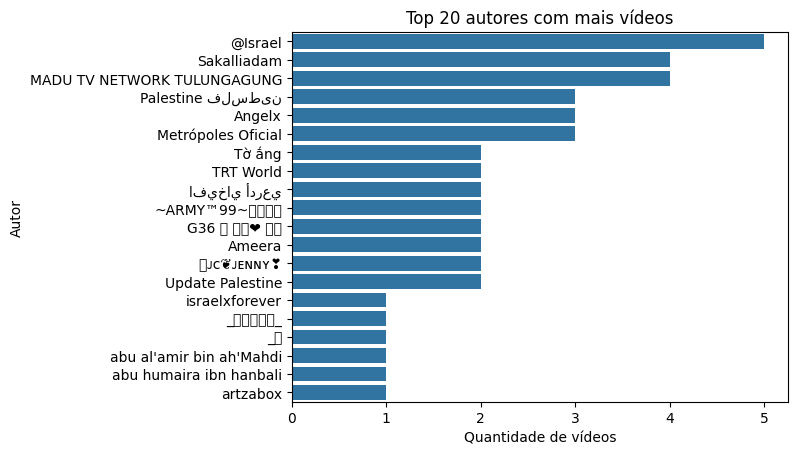

In [15]:
top20 = df.value_counts('author.nickname').head(20).reset_index()

sns.barplot(data=top20, y='author.nickname', x='count')
plt.title('Top 20 autores com mais vídeos')
plt.xlabel('Quantidade de vídeos')
plt.ylabel('Autor')
plt.show()

> Comentário:

Apesar de ser um tema de impacto, as contas não tem muitos vídeos sobre o conflito. Apenas 3 contas postaram mais de 3 vídeos. ISrael, Sakalliadam e MADU TV são os que mais postaram, mas ainda assim, poucos, ou seja, dentro da busc do TikTok, tais autores não postaram tanto. 

### 5) Faça uma nuvem de palavras com as 100 hashtags mais utilizadas na base. (0,2)

Faça uma nuvem de palavras com as 100 hashtags mais utilizadas na base. (0,1)

Abaixo do gráfico, faça um comentário interpretativo sobre o que você observou nos resultados. (0,1)

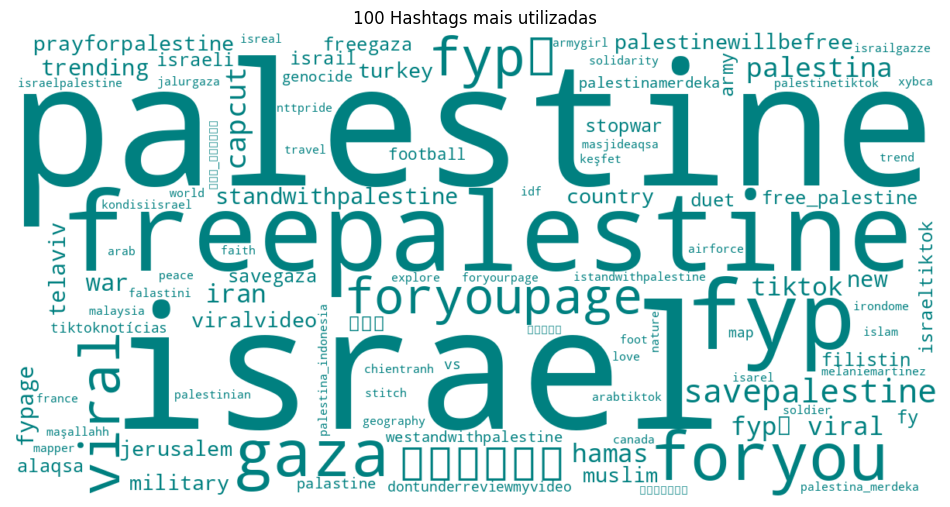

In [33]:
from wordcloud import WordCloud

texto = ' '.join(df['hashtags'].sum())

wordcloud = WordCloud(width=1200, height=600, background_color='white', color_func=lambda *args, **kwargs: 'teal', max_words=100).generate(texto)
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('100 Hashtags mais utilizadas')
plt.show()

> Comentário:
Palestina e Israel são as principais hashtags, seguidas de SavePalestine e FReePalestine, além de PrayForPalestine e PalestineWillBeFree. Hashtags pró-israel são pouco usadas e pouco aparecem.